### Diving into beer consumption in Sao Paulo

Have you ever wondered what does beer consumption in a huge metropils depend on? Here you go.<br>
First of all, I'm importing the basic libraries. Let's dive in the data and have a first look at it.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [4]:
full_data = pd.read_csv('consumo_cerveja.csv', decimal=',')
full_data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


I had to specify the decimal separator while importing a csv file, as our data had commas instead of dots while depicting float values.<br>
I'll use my basic knowledge of portuguese and translate the columns' names to make them easier to interpret.

In [5]:
full_data.rename(columns={'Data': 'Date', 'Temperatura Media (C)': 'Average Temperature (C)', 'Temperatura Minima (C)': 'Min Temperature (C)',
                          'Temperatura Maxima (C)': 'Max Temperature (C)', 'Precipitacao (mm)': 'Precipitation (mm)', 
                          'Final de Semana': 'Weekend', 'Consumo de cerveja (litros)': 'Beer consumption (liters)'}, inplace=True)
full_data.head()

,Date,Average Temperature (C),Min Temperature (C),Max Temperature (C),Precipitation (mm),Weekend,Beer consumption (liters)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [6]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       365 non-null    object 
 1   Average Temperature (C)    365 non-null    float64
 2   Min Temperature (C)        365 non-null    float64
 3   Max Temperature (C)        365 non-null    float64
 4   Precipitation (mm)         365 non-null    float64
 5   Weekend                    365 non-null    float64
 6   Beer consumption (liters)  365 non-null    object 
dtypes: float64(5), object(2)
memory usage: 51.6+ KB


In [7]:
data_null = full_data.isnull().unstack()

data_null_index = data_null[data_null]

data_null_index.head(15)

Date  365    True
      366    True
      367    True
      368    True
      369    True
      370    True
      371    True
      372    True
      373    True
      374    True
      375    True
      376    True
      377    True
      378    True
      379    True
dtype: bool

In [8]:
data_null_index.tail(15)

Beer consumption (liters)  926    True
                           927    True
                           928    True
                           929    True
                           930    True
                           931    True
                           932    True
                           933    True
                           934    True
                           935    True
                           936    True
                           937    True
                           938    True
                           939    True
                           940    True
dtype: bool

The data seems very consistent with the informative columns.<br>
The only incoherency I can see is that although total number of rows is 941, in fact just the first 365 rows consist of records. The rest is empty - let's delete them.

In [9]:
full_data.dropna(subset=['Date'], axis=0, inplace=True)

In [10]:
full_data.shape

(365, 7)

In [11]:
full_data['Date'] = pd.to_datetime(full_data['Date'], format="%Y-%m-%d")

### Data Analysis

I'm going to check a distribution of our target value and its skewness and kurtosis.

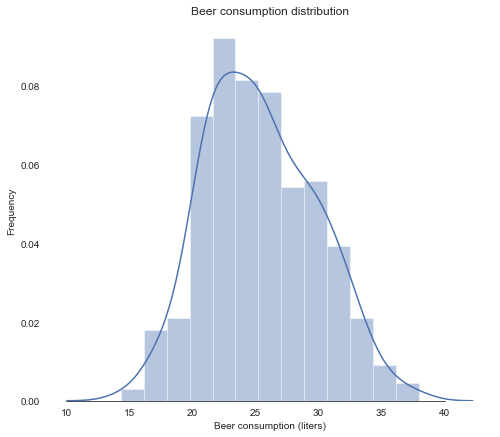

In [12]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))

sns.distplot(full_data['Beer consumption (liters)'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Beer consumption (liters)")
ax.set(title="Beer consumption distribution")
sns.despine(trim=True, left=True)
plt.show()

In [13]:
print("Skewness: %f" % full_data['Beer consumption (liters)'].skew())
print("Kurtosis: %f" % full_data['Beer consumption (liters)'].kurt())

Skewness: 0.270268
Kurtosis: -0.396365


**Observations:**

- Just by looking at the distribution plot I can say that our target value is distributed fairly normally, neither heavy-tailed nor light-tailed, I  might think about further normalization as the analysis progresses. Nevertheless the shape of the plotted curve is not heavily distinct from the desired bell-curve.
- Very helpful in the interpretations of the distribution plots is Kurtosis and Skewness measure. If both of them oscillate near 0, that means that our distribution is does not lack of symmetry and is fairly normally distributed.

Vast majority of the first records have either 0 or 1 in the "Precipitations" column. I'm going to examine the rest of its values throughout the entire dataset. If the noly values that appear are 0s and 1s that column might be useless for my model, so I would drop it.

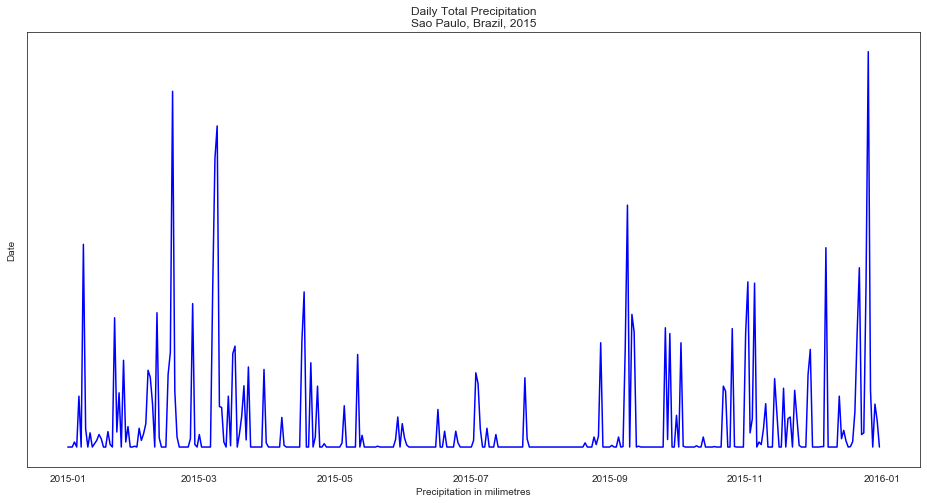

In [14]:
fig, ax = plt.subplots(figsize=(16, 8))

# Add x-axis and y-axis
ax.plot(full_data['Date'],
        full_data['Precipitation (mm)'],
        color='blue')
ax.set_ylabel('Date')
ax.set_xlabel('Precipitation in milimetres')

# Set title and labels for axes
ax.set_yticklabels([])
ax.set(title="Daily Total Precipitation\nSao Paulo, Brazil, 2015")

plt.show()

Looks like the problem with 0s and 1s as the only values appeared just at the beginning of the dataset.<br>
Let's visualise numerical features with respect to the target.

In [15]:
features = []
for i in full_data.columns:
    if full_data[i].dtype == 'float64':
        features.append(i)

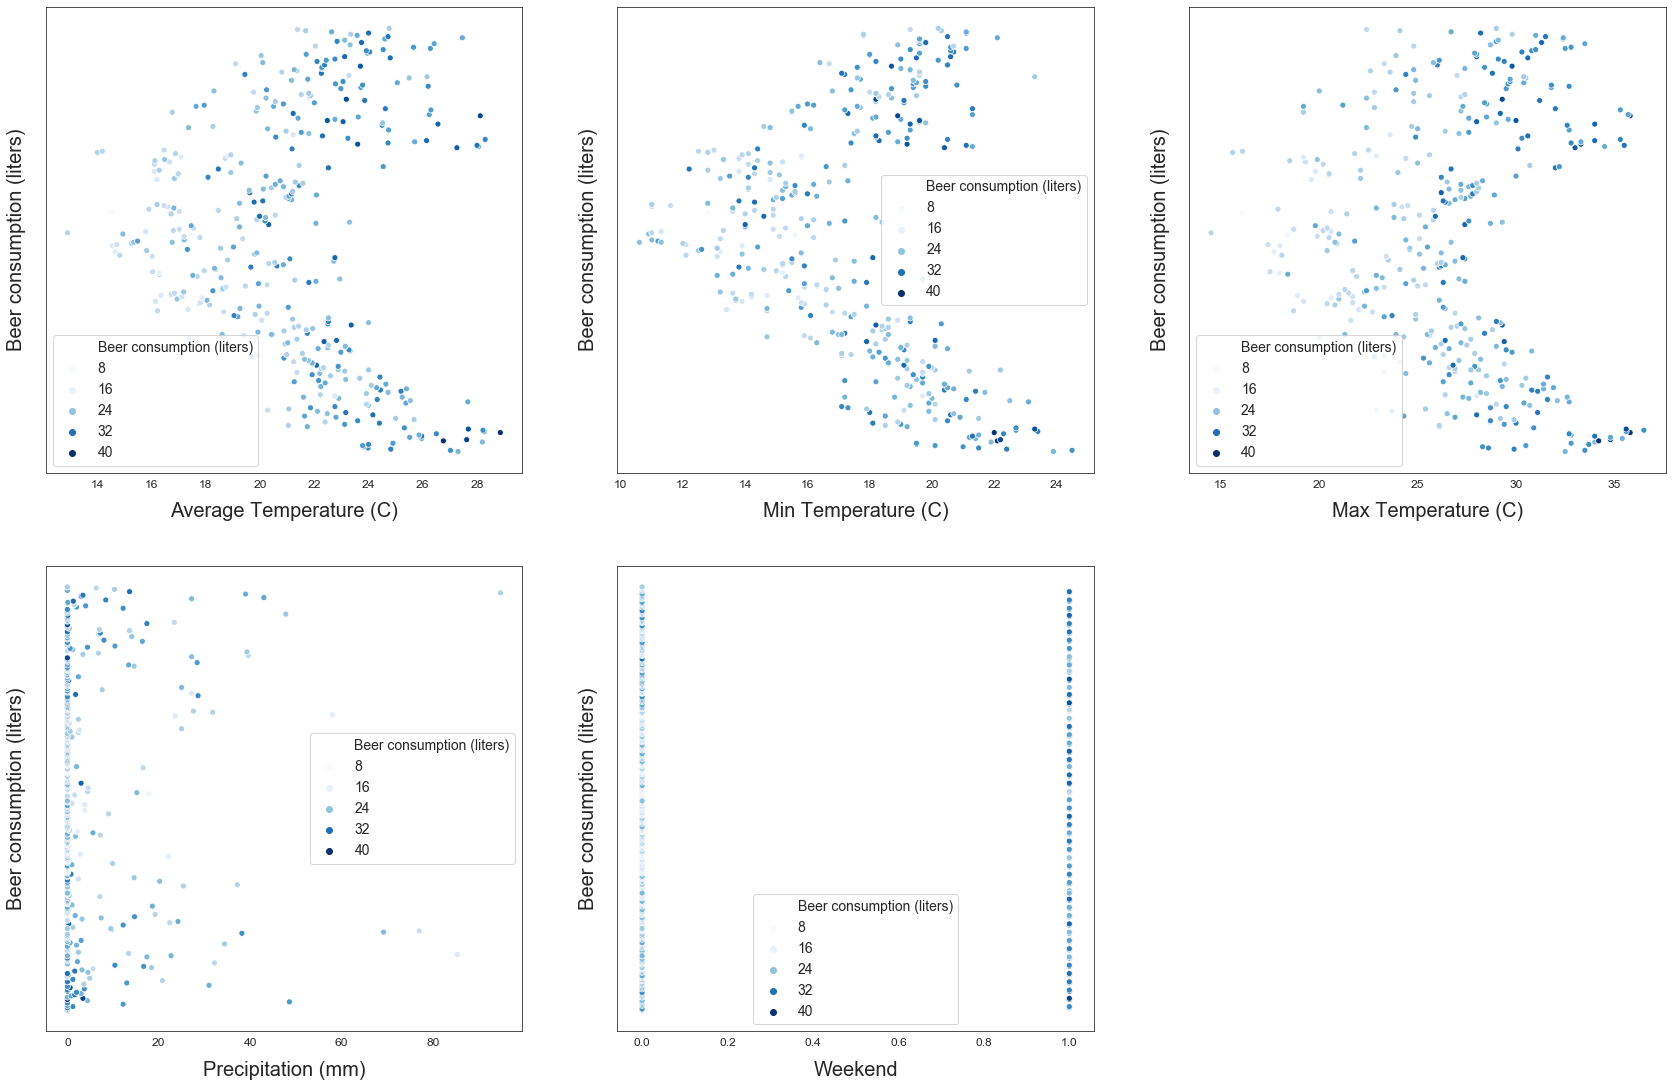

In [16]:
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12,20))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(full_data[features]), 1):

    plt.subplot(len(list(features)), 3, i)
    sns.scatterplot(x=feature, y='Beer consumption (liters)', hue='Beer consumption (liters)', palette='Blues', data=full_data)
    ax = plt.gca()
    ax.set_yticklabels([])
    
    plt.xlabel('{}'.format(feature), size=20,labelpad=12.5)
    plt.ylabel('Beer consumption (liters)', size=20, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 14})
        
plt.show()

**Observations:**

- More beer is being consumed as the temperature rises - all of the plots depicting temperatures are unequivocally showing that.
- As the rainfall rises, beer consumption drops. Seems like either Brazilians don't like drinking beer in rain or it's because of dropping temperature what's influenced by rainfall.
- Beer consumption on weekends is much larger.

In [17]:
full_data['Beer consumption (liters)'] = pd.to_numeric(full_data['Beer consumption (liters)'])

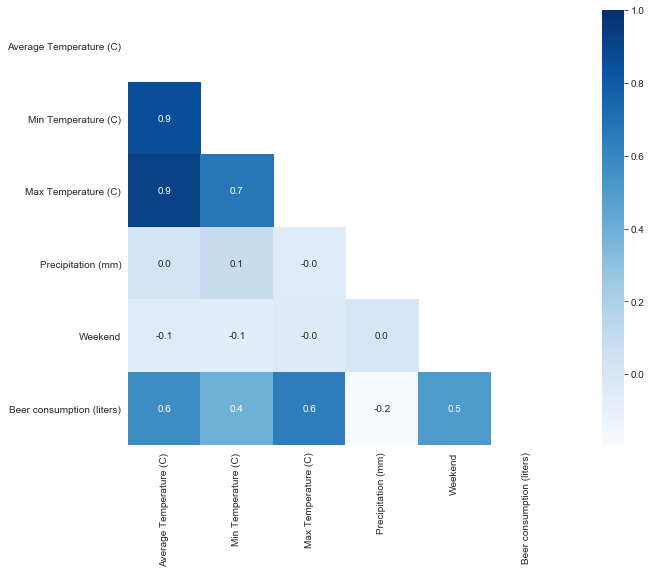

In [18]:
corr_matrix = full_data.corr()
mask=np.triu(corr_matrix.corr())
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='Blues', square=True, mask=mask)

The correlation matrix shows that all the features are similarly correlated with beer consumption, apart from Precipitation which is closest to 0 and as the only feature is negatively correlated.

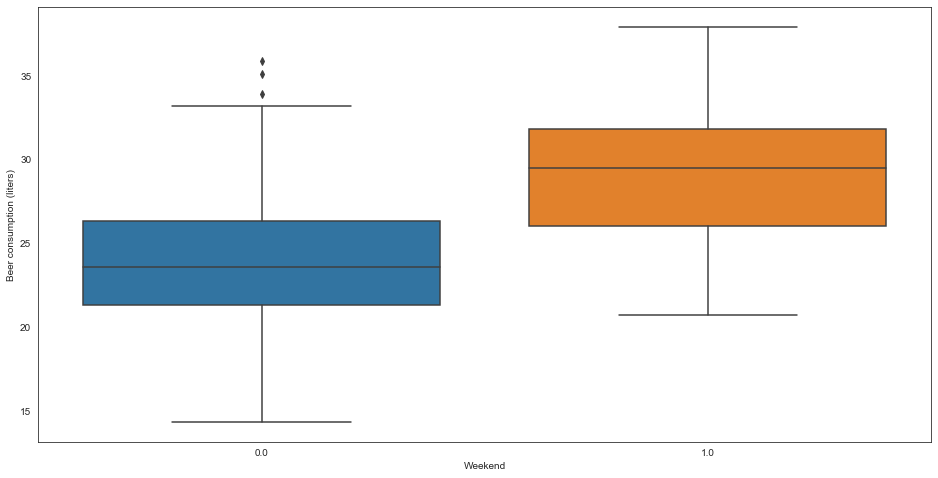

In [19]:
data = pd.concat([full_data['Weekend'], full_data['Beer consumption (liters)']], axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=full_data['Weekend'], y='Beer consumption (liters)', data=full_data)

The boxplots are showing that the dataset might have some outliers. As found out before already, biggest beer consumption among habitants of Sao Paulo happen on weekends. Some of the values on the working days are nearly as big as the largest on the weekends. Does that happen that Brazilians are thirsty for beer in the middle of the week or did I just encounter outliers?<br>
Let's find out below.

### Feature engineering

In [20]:
max_treshold = full_data['Beer consumption (liters)'].quantile(0.97)

In [21]:
full_data[full_data['Beer consumption (liters)'] > max_treshold].sort_values(by=['Beer consumption (liters)'], ascending=False)

,Date,Average Temperature (C),Min Temperature (C),Max Temperature (C),Precipitation (mm),Weekend,Beer consumption (liters)
9,2015-01-10,26.76,22.1,34.2,0.0,1.0,37.937
16,2015-01-17,28.86,22.0,35.8,0.0,1.0,37.690
10,2015-01-11,27.62,22.2,34.8,3.4,1.0,36.254
287,2015-10-15,28.12,18.9,35.8,0.0,0.0,35.861
303,2015-10-31,23.18,18.2,29.3,0.0,1.0,35.781
19,2015-01-20,27.68,23.3,35.6,0.6,0.0,35.127
262,2015-09-20,23.60,19.2,33.3,0.0,1.0,34.695
283,2015-10-11,22.48,19.6,30.0,0.0,1.0,34.496
331,2015-11-28,23.70,18.7,29.8,0.0,1.0,34.382
259,2015-09-17,27.26,20.4,33.0,0.0,0.0,33.930


I cannot say clearly whether all the entries that have large values of beer consumption on the working days are outliers. For sure that might happen that people drink more, especially when the temperature is also high and it doesn't rain on that day.<br>
Nevertheless record no. 19 seems pretty unlikely as it has high value, whereas it happened on the rainy working day.<br>
I'll treat that value as an outlier and delete it.

In [22]:
full_data.drop(index=19, inplace=True)

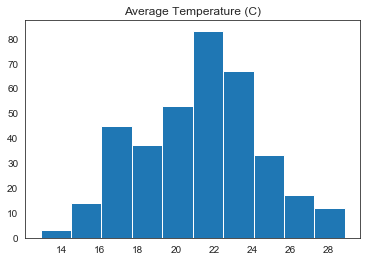

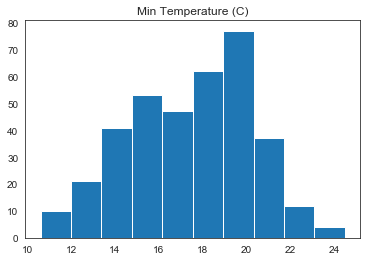

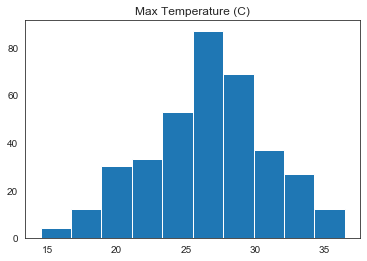

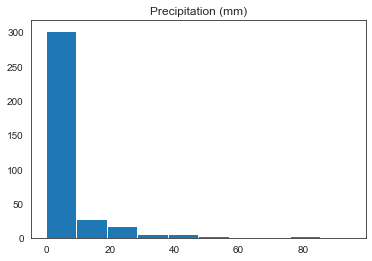

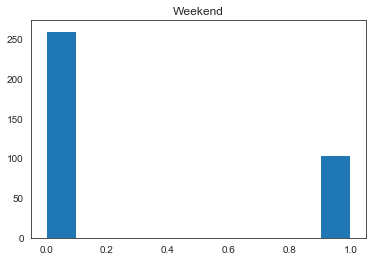

In [23]:
for i in features:
    plt.hist(full_data[i])
    plt.title(i)
    plt.show()

As I inspected earlier - my target value is distributed quite normally, it's not necessary to make it look more similar to normal distribution.<br>
Notwithstanding I see that all the other features are much 'further' from being normally distributed. Most of them have large standard deviation, one of them is left-tailed, one of them is in fact categorical feature, but I can treat it as 'one-hot-encoded' already.<br>
In this situation I'm going to put the logarithm on the target variable and measure the skewness of the other features. Those features that will have skewness metric more than 0.5 will be transformed using Box-Cox Transformation.

In [24]:
full_data['Beer consumption (liters)'] = np.log1p(full_data['Beer consumption (liters)'])


 mu = 3.26 and sigma = 0.17



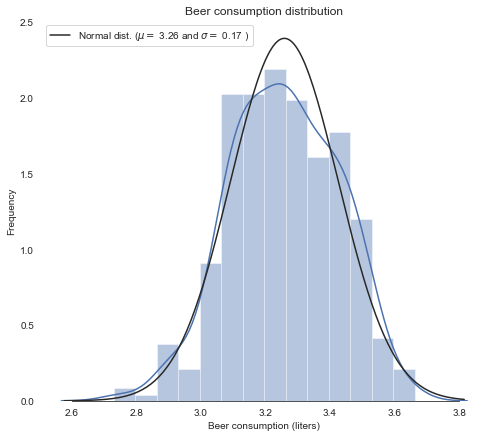

In [25]:
from scipy.stats import norm, skew

sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(full_data['Beer consumption (liters)'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(full_data['Beer consumption (liters)'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Beer consumption (liters)")
ax.set(title="Beer consumption distribution")
sns.despine(trim=True, left=True)

plt.show()

The standard deviation and the mean value are very close to the optimal ones now.

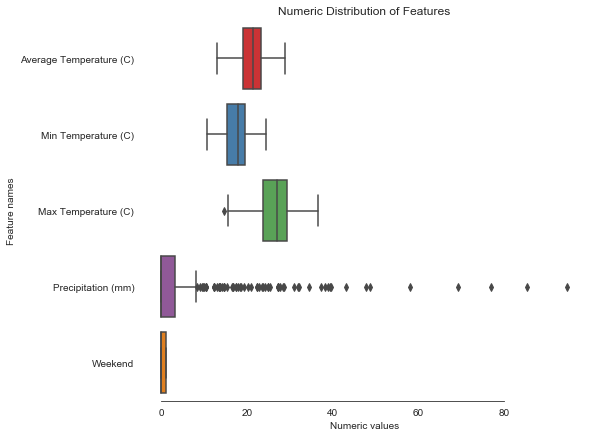

In [26]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
# ax.set_xscale("log")
ax = sns.boxplot(data=full_data[features] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [27]:
# Find skewed numerical features
skew_features = full_data[features].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 2 numerical features with Skew > 0.5 :


Precipitation (mm)         3.758624
Weekend                    0.948683
Average Temperature (C)   -0.056367
Max Temperature (C)       -0.165373
Min Temperature (C)       -0.235337
dtype: float64

In [28]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

for i in skew_index:
    full_data[i] = boxcox1p(full_data[i], boxcox_normmax(full_data[i] + 1))

All the features are fairly normally distributed now.<br>

I'll make use of the "Date" column now - Let's have a look what's the dependency between the difference in temperature throughout the day, month and the target variable.

In [29]:
full_data = full_data.assign(Month=full_data.Date.dt.month)

In [30]:
full_data['Delta Temperature (C)'] = full_data['Max Temperature (C)'] - full_data['Min Temperature (C)']

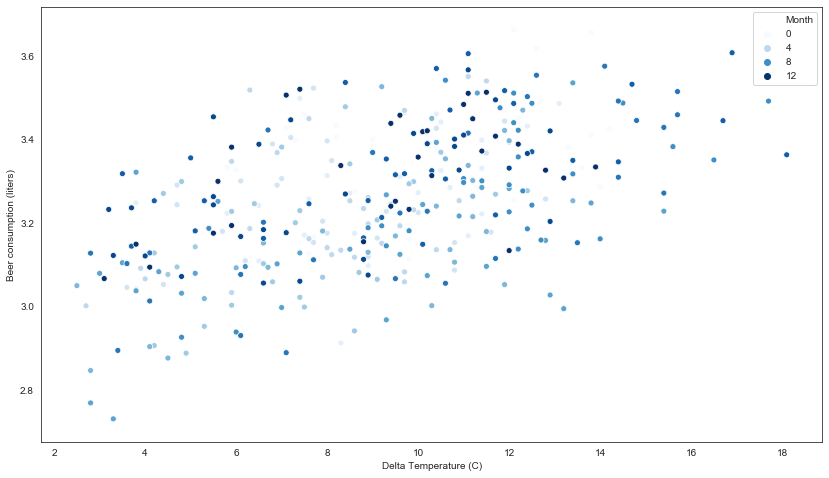

In [31]:
plt.figure(figsize= (14,8))
sns.scatterplot(x=full_data['Delta Temperature (C)'], y='Beer consumption (liters)', hue='Month', palette='Blues', data=full_data)

The plot above is not really introducing any information that would be much different from information I have already thanks to the previous plots.

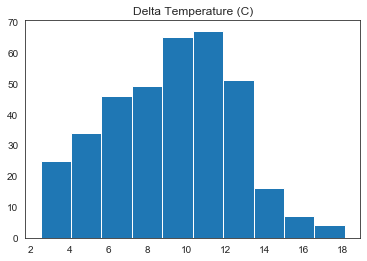

In [32]:
plt.hist(full_data["Delta Temperature (C)"])
plt.title('Delta Temperature (C)')
plt.show()

I'm separating the dataset between prior to building the models.<br>
Just for the record - the target variable is Beer consumption.

In [33]:
X = full_data.drop(['Beer consumption (liters)', 'Date', 'Month'], axis=1)
y = full_data['Beer consumption (liters)']

### Model building

The main target of this project are ensemble methods - Stacking and Blending. Therefore I'm not going to spend much time (well, in fact any time...) on finding and tuning the basic models' parametres. I implemented the hyperparametres that are performing quite reasonably in most of the models I'm building.<br> Of course in some cases they perform better, in others worse, nonetheless by trial and error they're good starting point for many approaches.<br>
I'm going to build a meta-model based on the more advanced regressors, e.g. GradientBoosting and its derivatives.

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

I'm creating two functions:
- Calculating root mean squared error
- Calculating cross validation scores<br>

I'm using KFold split equals 10 with shuffling.

In [35]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=10, random_state=42, shuffle=True)

def mse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_score(model, X):
    cv = np.sqrt(-cross_val_score(model, X, y_train, scoring='neg_mean_squared_error', cv=kf))
    return cv

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler

from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings(action="ignore")

In [37]:
alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 
          0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]

ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas, cv=kf))

In [38]:
svm = make_pipeline(RobustScaler(), SVR(C=20, epsilon=0.008, gamma=0.0003))

In [39]:
gbr = GradientBoostingRegressor(n_estimators=6000, learning_rate=0.01, max_depth=4, max_features='sqrt', min_samples_leaf=15,
                                min_samples_split=10, loss='huber', random_state=42)

In [40]:
rf = RandomForestRegressor(n_estimators=1200, max_depth=15, min_samples_split=5, min_samples_leaf=5, max_features=None,
                          oob_score=True, random_state=42)

In [41]:
xgb = XGBRegressor(learning_rate=0.01, n_estimators=6000, max_depth=4, min_child_weight=0, gamma=0.6, subsample=0.7,
                       colsample_bytree=0.7, objective='reg:squarederror', nthread=-1, scale_pos_weight=1, seed=27, reg_alpha=0.00006,
                       random_state=42)

In [42]:
lgb = LGBMRegressor(objective='regression', num_leaves=6, learning_rate=0.01, n_estimators=7000, max_bin=200, 
                       bagging_seed=8, feature_fraction_seed=8, verbose=-1, random_state=42)

On each run of cross validation I fitted 6 models which is very straightforward.<br>
The only note that is worth taking is that prior to fitting Ridge Regression and Support Vector Machine I'm transferring the features through RobustScaler, so that the data is being scaled accordingly to the Interquartile Range, that helps while messing with outliers that could influence the mean/variance in a negative way.<br>

Stacking is being executed on the models seen above as base models, whereas as a meta model (model that learns how to best combine the predictions of the base models) I've chosen XGBoost.

In [43]:
stack = StackingCVRegressor(regressors=(xgb, lgb, svm, ridge, gbr, rf), meta_regressor=xgb, use_features_in_secondary=True)

In [73]:
scores = {}

score = cv_score(ridge, X_train)
print('Ridge score: {:.4f}'.format(score.mean()))
scores['RidgeCV'] = (score.mean(), score.std())

Ridge score: 0.0904


In [74]:
score = cv_score(svm, X_train)
print('SVM score: {:.4f}'.format(score.mean()))
scores['SVM'] = (score.mean(), score.std())

SVM score: 0.0923


In [75]:
score = cv_score(gbr, X_train)
print('GBR score: {:.4f}'.format(score.mean()))
scores['GBR'] = (score.mean(), score.std())

GBR score: 0.1069


In [76]:
score = cv_score(rf, X_train)
print('RF score: {:.4f}'.format(score.mean()))
scores['RF'] = (score.mean(), score.std())

RF score: 0.0972


In [77]:
score = cv_score(xgb, X_train)
print('XGB score: {:.4f}'.format(score.mean()))
scores['XGB'] = (score.mean(), score.std())

XGB score: 0.1209


In [78]:
score = cv_score(lgb, X_train)
print('LGB score: {:.4f}'.format(score.mean()))
scores['LGB'] = (score.mean(), score.std())

LGB score: 0.1093


In [50]:
stack_fit = stack.fit(np.array(X_train), np.array(y_train))
ridge_fit = ridge.fit(X_train, y_train)
svm_fit = svm.fit(X_train, y_train)
gbr_fit = gbr.fit(X_train, y_train)
rf_fit = rf.fit(X_train, y_train)
xgb_fit = xgb.fit(X_train, y_train)
lgb_fit = lgb.fit(X_train, y_train)

In [83]:
ranking = pd.DataFrame().from_dict(scores, orient='index', columns=['Mean', 'Std'])
ranking.sort_values(by=['Mean'], inplace=True)
display(ranking.style.background_gradient(cmap='summer_r'))

,Mean,Std
RidgeCV,0.090439,0.007671
SVM,0.092350,0.007656
RF,0.097229,0.009662
GBR,0.106867,0.012393
LGB,0.109273,0.014606
XGB,0.120894,0.013602


Looks like my models even without any in-depth tuning are performing reasonably well. Above we see a comparison of their performance based on the mean cross validation score and the standard deviation.<br>
Let's try to blend them - I combine all the fitted models together with attached weights. As I mentioned earlier, this project is not focused on tuning hyperparametres, finding optimal values using GridSearch, VotingClassifiers or other more advanced methods.<br>
The weights I've chosen are pretty much "default", whereas RandomForest and StackingRegressor got respectively weights 3 and 3 times larger than other models.<br>

In [53]:
def blended_predictions(X):
    pred = (0.1 * ridge_fit.predict(X)) + (0.1 * svm_fit.predict(X)) + (0.1 * gbr_fit.predict(X)) + (0.3 * rf_fit.predict(X)) + (0.1 * xgb_fit.predict(X)) + (0.1 * lgb_fit.predict(X)) + (0.2 * stack_fit.predict(np.array(X)))
    return pred

In [54]:
blended_score = mse(y_train, blended_predictions(X_train))
scores['BlendedPrediction'] = (blended_score, 0)
print(blended_score)

0.07298037840340804


### Models' comparison

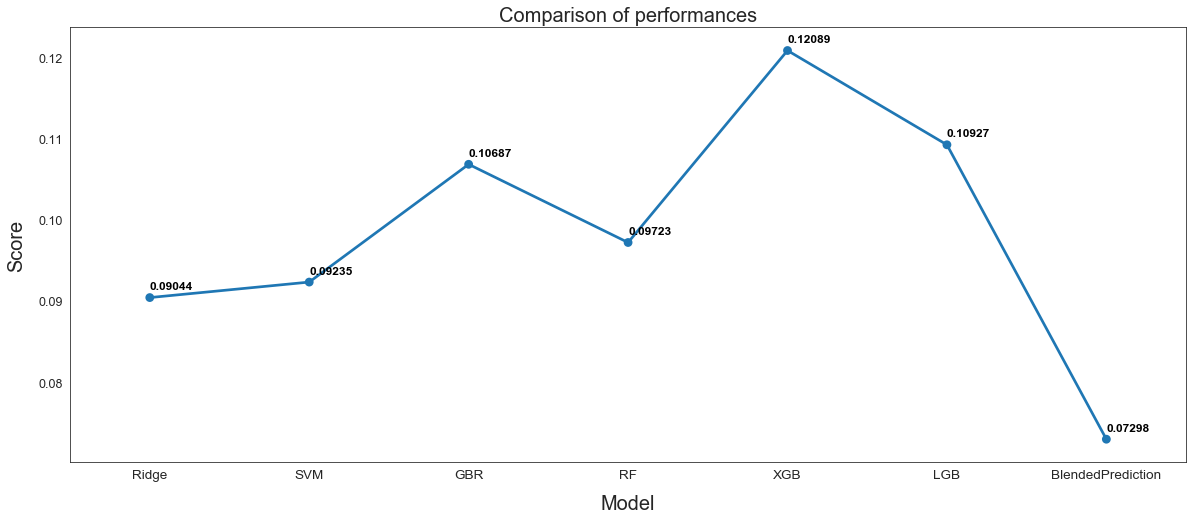

In [55]:
sns.set_style("white")
fig = plt.figure(figsize=(20, 8))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.001, '{:.5f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Comparison of performances' , size=20)

plt.show()

In [56]:
import pickle

with open('beer_consumption_model.pickle', 'wb') as f:
    pickle.dump(ridge, f)

In [57]:
import json

columns = {
    "data columns": [col.lower() for col in X.columns]
}

with open('beer_consumption_columns.json', 'w') as f:
    f.write(json.dumps(columns))

### Conclusion

In this brief regression project I was looking for the optimal model that's capable of predicting beer consumption in one of the biggest cities in Brazil based on the few factors like precipitation and temperature.<br>
The data was collected in Sao Paulo in a university area, respondents being groups of students between 18 and 28 years old.<br>
Keeping in mind that I didn't possess too many features, I was still able to build and fit decent models in a reasonably short time (I didn't spend any time on tuning the models or looking for more adequate alternatives - simply that wasn't the main goal of the project).<br>
Luckily the data wasn't too messy, I noticed a putative outlier though, while going through basic EDA.<br>
Skewness of the features wasn't big enough to cause any noticeable damage on the predictions, nevertheless using Box-Cox transformation seemed like a step worth-trying.<br>
The model that generated the smallest error (0.073) was a Blender made up from simpler regressors. The gain on the blending is clearly visible in the last plot.<br>
The main objective of this notebook was to show the great potential in ensemble methods like Stacking and Blending. At the same time the imagination on the problems, algorithms and the processes I got while working on this project is not to be overestimated.<br>

### Future work and possible improvements

- There's still a huge room for improvement when it comes to feature engineering. As we have a datetime format column in a dataset, it's possible to use it for further inspections on the data. I used the month value to see how the beer consumption depends on the month. Similar and much more advanced actions would be possible while including also day in it. I did not experiment much when it comes to new feature creation - the only new feature I came up with was delta temperature. Definitely more in-depth inspections in new features' creation would be priceless, while aiming to improve the final model predictions.
- I did not do hyperparameter tuning at all, so it's more than obvious mentioning it here. That's the first step I would take in order to improve the model. Finding optimal parametres for 6 models, then experimenting with giving them diversed weights would lead to the massive improvements.
- Plotting partial dependence plots could give a great overview on the importance of the features that the model came up with. Model explainability is a technique worth giving a try, especially before experiments with feature engineering.

### UI Deployment

In order to make the model more accessible (and at the same time more eye-friendly) with a help of a dozen or so additional lines of code, I created a user-friendly interface that allows us to insert chosen features' values and get the prediction on the beer consumption back.<br>

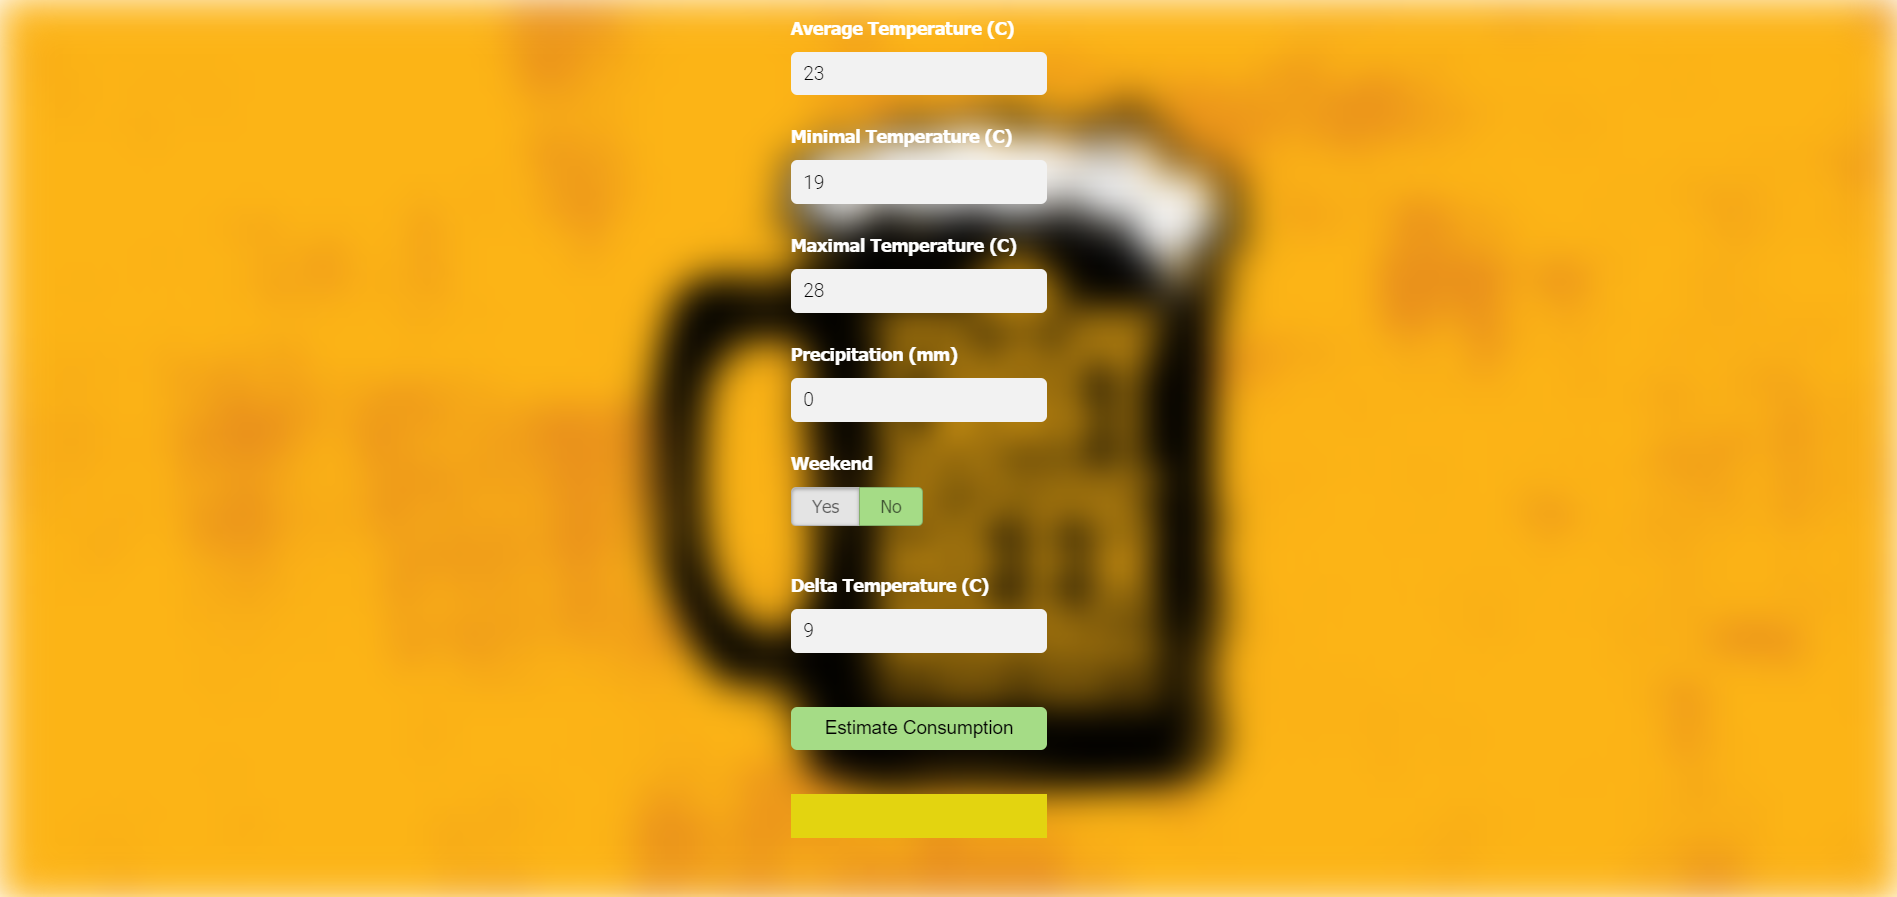

In [3]:
Image(filename='ui_screenshot.png')

I exported the optimal model as a pickle file and with the help of simple CSS, HTML and JS scripts I got to the effect shown above.<br>
Because all this project is about, is ensemble ML techniques, I'm not going to explain the code that has been written there. I treat this UI as a leeway or small bonus after completing my main objective :) Feel free to have a glance in your free time.<br>

<i>Paweł Sulewski</i>